In [6]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scikit-surprise --quiet
import numpy
print("✅ NumPy version:", numpy.__version__)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
✅ NumPy version: 2.0.2


In [1]:
# Install and import all required packages
!pip install --upgrade --force-reinstall numpy==1.26.4 scikit-surprise matplotlib seaborn --quiet

from surprise import Dataset, Reader, KNNBasic, SVD, accuracy
from surprise.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

print("✅ All imports loaded successfully")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 137.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 147.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 152.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [3]:
# Load the inbuilt MovieLens-100K dataset
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

print("Training ratings:", len(list(trainset.all_ratings())))
print("Testing ratings:", len(testset))


Training ratings: 80000
Testing ratings: 20000


In [4]:
sim_options = {"name": "cosine", "user_based": True}
user_cf = KNNBasic(sim_options=sim_options, k=30, min_k=5)
user_cf.fit(trainset)
pred_user = user_cf.test(testset)
print("User-based CF RMSE:", round(accuracy.rmse(pred_user, verbose=False), 4))


Computing the cosine similarity matrix...
Done computing similarity matrix.
User-based CF RMSE: 1.0243


In [5]:
sim_options = {"name": "cosine", "user_based": False}
item_cf = KNNBasic(sim_options=sim_options, k=30, min_k=5)
item_cf.fit(trainset)
pred_item = item_cf.test(testset)
print("Item-based CF RMSE:", round(accuracy.rmse(pred_item, verbose=False), 4))


Computing the cosine similarity matrix...
Done computing similarity matrix.
Item-based CF RMSE: 1.0327


In [6]:
svd_model = SVD(n_factors=20, random_state=42)
svd_model.fit(trainset)
pred_svd = svd_model.test(testset)
print("SVD RMSE:", round(accuracy.rmse(pred_svd, verbose=False), 4))


SVD RMSE: 0.935


In [7]:
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rating", "timestamp"])
pivot = df.pivot_table(values="rating", index="user", columns="item")
pivot.head()


item,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


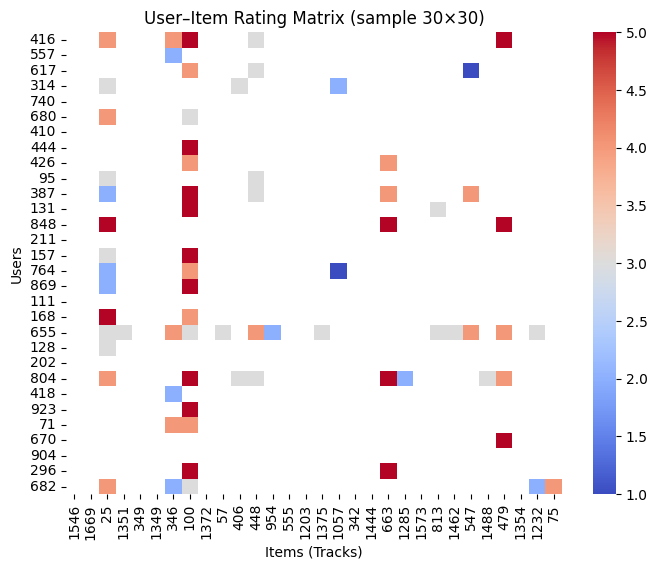

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot.sample(30, axis=0).sample(30, axis=1), cmap="coolwarm", cbar=True)
plt.title("User–Item Rating Matrix (sample 30×30)")
plt.xlabel("Items (Tracks)")
plt.ylabel("Users")
plt.show()


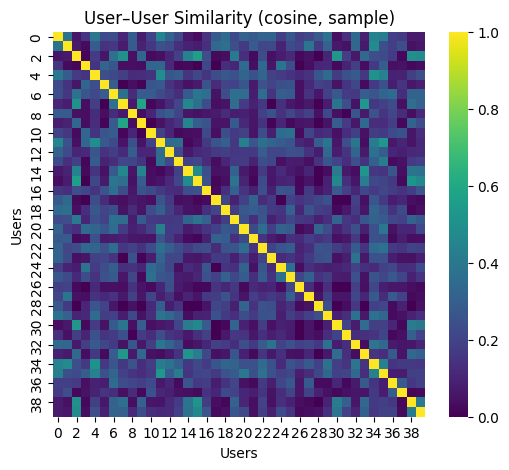

In [9]:
user_vectors = pivot.fillna(0).values
user_sim = cosine_similarity(user_vectors)
plt.figure(figsize=(6, 5))
sns.heatmap(user_sim[:40, :40], cmap="viridis")
plt.title("User–User Similarity (cosine, sample)")
plt.xlabel("Users")
plt.ylabel("Users")
plt.show()


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f3c045bbe20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


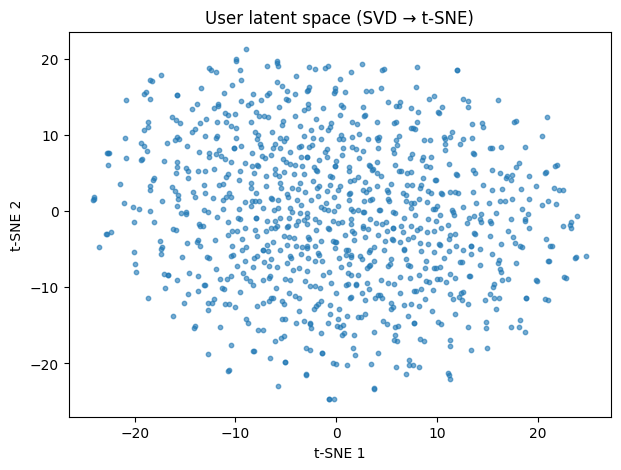

In [10]:
U = svd_model.pu  # user latent vectors
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto', perplexity=30)
coords = tsne.fit_transform(U)

plt.figure(figsize=(7, 5))
plt.scatter(coords[:, 0], coords[:, 1], s=10, alpha=0.6)
plt.title("User latent space (SVD → t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


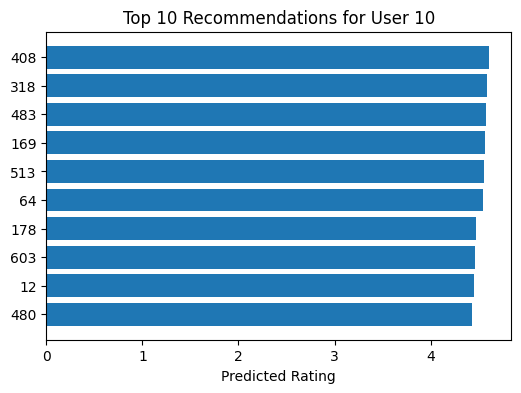

1. Item 408 (predicted rating: 4.61)
2. Item 318 (predicted rating: 4.58)
3. Item 483 (predicted rating: 4.57)
4. Item 169 (predicted rating: 4.56)
5. Item 513 (predicted rating: 4.56)
6. Item 64 (predicted rating: 4.54)
7. Item 178 (predicted rating: 4.47)
8. Item 603 (predicted rating: 4.46)
9. Item 12 (predicted rating: 4.45)
10. Item 480 (predicted rating: 4.43)


In [11]:
user_id = 10
all_items = df['item'].unique()
known_items = df[df['user'] == user_id]['item'].tolist()

preds = [(iid, svd_model.predict(user_id, iid).est) for iid in all_items if iid not in known_items]
top_n = sorted(preds, key=lambda x: x[1], reverse=True)[:10]

top_items = [str(i) for i, _ in top_n]
scores = [s for _, s in top_n]

plt.figure(figsize=(6, 4))
plt.barh(top_items[::-1], scores[::-1])
plt.xlabel("Predicted Rating")
plt.title(f"Top 10 Recommendations for User {user_id}")
plt.show()

for i, (iid, score) in enumerate(top_n, start=1):
    print(f"{i}. Item {iid} (predicted rating: {score:.2f})")
